In [13]:
import os

In [14]:
paths = {
    'WORKSPACE_PATH': os.path.join('Traffic_Sign_Recognition', 'workspace'),
    'DATASET_PATH': os.path.join('Traffic_Sign_Recognition', 'workspace', 'dataset'),
    'MODEL_PATH': os.path.join('Traffic_Sign_Recognition', 'workspace', 'models')
}

In [15]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

Load datasets from Kaggle into Google Colab!
- Select dataset from Kaggle: gtsrb-german-traffic-sign
- Download API credentials:  file 'kaggle.json'
- Upload file 'kaggle.json' to colab

---



In [16]:
!pip install -q kaggle

In [17]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
!cp kaggle.json ~/.kaggle/

In [19]:
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 611M/612M [00:15<00:00, 62.3MB/s]
100% 612M/612M [00:15<00:00, 41.5MB/s]


In [21]:
from zipfile import ZipFile

In [22]:
with ZipFile('Traffic_Sign_Recognition/workspace/dataset/gtsrb-german-traffic-sign.zip', 'r') as data:
  data.extractall('Traffic_Sign_Recognition/workspace/dataset')

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [24]:
data = []
labels = []
# We have 43 Classes
classes = 43

In [25]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img

In [26]:
import cv2
for i in range(classes):
    path = os.path.join(paths['DATASET_PATH'],'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            #img = grayscale(image)
            #img1 = equalize(img)
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [27]:
data = np.array(data)
labels = np.array(labels)

In [28]:
os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

In [29]:
data=np.load('Traffic_Sign_Recognition/workspace/dataset/training/data.npy')
labels = np.load('Traffic_Sign_Recognition/workspace/dataset/training/target.npy')

In [30]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [33]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [34]:
from keras.layers.normalization.batch_normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

#model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))

#model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [35]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 24s 14ms/step - loss: 0.3975 - accuracy: 0.8976 - val_loss: 0.0424 - val_accuracy: 0.9878
Epoch 2/20
981/981 [==============================] - 11s 12ms/step - loss: 0.0547 - accuracy: 0.9849 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 3/20
981/981 [==============================] - 15s 15ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 0.0271 - val_accuracy: 0.9940
Epoch 4/20
981/981 [==============================] - 11s 11ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.0395 - val_accuracy: 0.9881
Epoch 5/20
981/981 [==============================] - 11s 11ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0181 - val_accuracy: 0.9946
Epoch 6/20
981/981 [==============================] - 11s 11ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0203 - val_accuracy: 0.9943
Epoch 7/20
981/981 [==============================] - 11s 12ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0173 - val_accuracy:

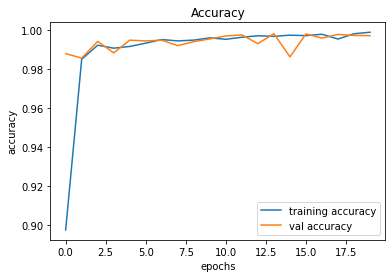

In [37]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

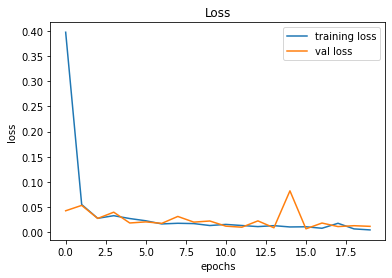

In [50]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
def testing(testcsv):
    y_test = testcsv
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [40]:
path = os.path.join(paths['DATASET_PATH'])
y_test = pd.read_csv('Traffic_Sign_Recognition/workspace/dataset/Test.csv')
label = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
  image = Image.open(path + '/' + img)
  image = image.resize((30,30))
  data.append(np.array(image))
X_test=np.array(data)

In [41]:
#Y_pred = model.predict_classes(X_test)
#Y_pred
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([16,  1, 38, ...,  3,  7, 10])

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.9789390340459224


In [51]:
#model.save(paths['MODEL_PATH'], 'TSR.h5')

TypeError: ignored

In [52]:
os.mkdir('trained_model')
model.save("./trained_model/TSR.h5")

In [45]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    #Y_pred = model.predict_classes(X_test)
    predict_x = model.predict(X_test) 
    Y_pred = np.argmax(predict_x,axis=1)
    return image,Y_pred

Predicted traffic sign is:  Road work


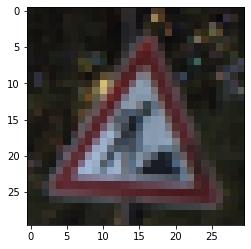

In [47]:
plot,prediction = test_on_img(r'Traffic_Sign_Recognition/workspace/dataset/Test/00153.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [57]:
!tar -czf models.tar.gz {"trained_model"}

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
